In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [10]:
avalanche_set = pd.read_csv('newData/gesamt_set_1.csv', sep=',')

In [11]:
avalanche_set['ID'] = avalanche_set['ID'].fillna(0)
avalanche_set = avalanche_set.drop([ 'Datum','Intervall', 'ID'], axis=1)
avalanche_set = avalanche_set.dropna()

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import statistics

feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']

lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))

cvs = cross_val_score(lr, X, y, cv=10)

In [13]:
print(statistics.mean(cvs))

0.7272365482891798


In [14]:
cvs = cross_val_score(lr, X, y, cv=10, scoring="precision")

In [15]:
print(statistics.mean(cvs))

0.6823737370475043


In [16]:
cvs = cross_val_score(lr, X, y, cv=5, scoring="precision")

In [17]:
print(statistics.mean(cvs))

0.6702599393883277


In [18]:
cvs = cross_val_score(lr, X, y, cv=10, scoring="recall")

In [19]:
print(statistics.mean(cvs))

0.5615544540823352


In [20]:
features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Einsinktiefe',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last1',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
features_selected_set

,Schneehöhe,Lufttemperatur_7h,Lufttemperatur_14h_Gew,Lufttemperatur_19h,Lufttemperatur_19h_Norm,Lufttemperatur_19h_Gew,Schneetemperatur,Einsinktiefe,Wetter_akt,Wetter_gestern,...,Neuschnee_Norm,Neuschnee_last4,Lufttemperatur_last1,Lufttemperatur_last4,meanExpo,meanSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,20.0,-1.4,99999.0,4.6,36.8,99999.0,0.0,20.0,1.0,7.0,...,200.0,0.0,0.000000,0.000000,240.622592,40.215386,3.598443,60.656714,2925.378871,0
1,19.0,3.9,10.4,3.2,25.6,18.4,0.0,16.0,2.0,1.0,...,0.0,200.0,15.466667,0.000000,86.721312,43.193688,0.000000,71.591813,2461.506438,0
2,19.0,7.6,14.0,2.7,21.6,12.8,0.0,9.0,1.0,1.0,...,0.0,200.0,28.266667,0.000000,95.782919,42.465800,0.000000,61.137880,2423.430860,0
3,4.0,-6.0,18.8,-4.4,-35.2,10.8,0.0,2.0,3.0,6.0,...,20.0,200.0,40.000000,0.000000,236.817015,36.165750,23.699150,52.545750,2344.716550,0
4,10.0,-5.1,-30.4,-2.7,-21.6,-17.6,0.0,8.0,73.0,0.0,...,100.0,220.0,-48.000000,15.466667,271.664767,41.924600,33.076000,54.920900,1980.761100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,175.0,-9.0,-40.0,-1.0,-8.0,-44.0,-11.0,17.0,1.0,8.0,...,210.0,100.0,-80.000000,2.666667,62.004911,41.474100,1.418093,65.950220,2223.063053,1
7017,155.0,4.0,-4.0,5.0,40.0,-4.0,-6.0,12.0,0.0,1.0,...,0.0,310.0,-29.333333,-10.666667,86.721312,43.193688,0.000000,71.591813,2461.506438,0
7018,149.0,-1.0,32.0,-1.0,-8.0,20.0,-16.0,12.0,0.0,0.0,...,0.0,310.0,45.333333,-40.000000,2.980625,37.066700,13.586900,50.025850,1967.563900,0
7019,144.0,-2.0,4.0,-10.0,-80.0,-4.0,-7.0,0.0,3.0,0.0,...,0.0,310.0,-2.666667,-80.000000,98.851562,41.040858,6.873767,71.013708,2637.582267,0


In [21]:

X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']

lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))

In [22]:
cvs = cross_val_score(lr, X, y, cv=10)
cvs

array([0.79516358, 0.6980057 , 0.80626781, 0.67806268, 0.6965812 ,
       0.71937322, 0.75498575, 0.73504274, 0.78774929, 0.68233618])

In [23]:
print(statistics.mean(cvs))

0.7353568143041828


In [24]:
cvs = cross_val_score(lr, X, y, cv=10, scoring="precision")
cvs

array([0.83157895, 0.62895928, 0.76494024, 0.58498024, 0.68918919,
       0.6978022 , 0.71179039, 0.73333333, 0.71080139, 0.57057057])

In [25]:
print(statistics.mean(cvs))

0.692394577722111


In [26]:
cvs = cross_val_score(lr, X, y, cv=10, scoring="recall")
cvs

array([0.58518519, 0.51672862, 0.71375465, 0.55018587, 0.37918216,
       0.47211896, 0.60594796, 0.48888889, 0.75555556, 0.7037037 ])

In [27]:
print(statistics.mean(cvs))

0.5771251548946716


In [32]:
cvs = cross_val_score(lr, X, y, cv=10, scoring='balanced_accuracy')
cvs

array([0.75564109, 0.66367609, 0.78874799, 0.65384582, 0.6364733 ,
       0.67254909, 0.72676151, 0.68888889, 0.78171296, 0.68634259])

In [33]:
print(statistics.mean(cvs))

0.7054639331910703


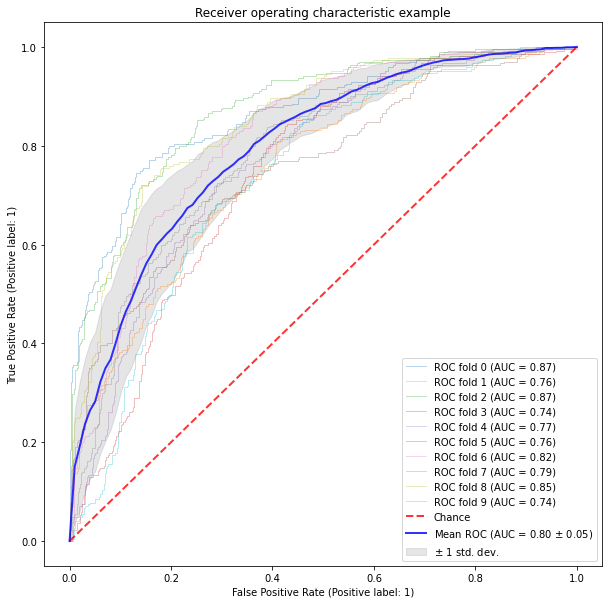

<Figure size 7200x7200 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Einsinktiefe',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last1',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X = StandardScaler().fit_transform(X,y)





cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
plt.figure(figsize=(100, 100))
ax.legend(loc="lower right")
plt.show()

/Users/max/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


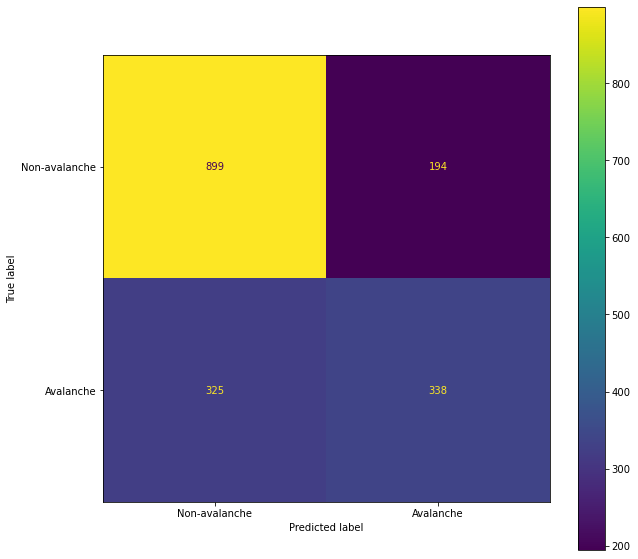

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features_selected_set = avalanche_set[['Schneehöhe',
                                       'Lufttemperatur_7h',
                                       'Lufttemperatur_14h_Gew',
                                       'Lufttemperatur_19h',
                                       'Lufttemperatur_19h_Norm',
                                       'Lufttemperatur_19h_Gew',
                                       'Schneetemperatur',
                                       'Einsinktiefe',
                                       'Wetter_akt',
                                       'Wetter_gestern',
                                       'Neuschnee_x',
                                       'Neuschnee_Norm',
                                       'Neuschnee_last4',
                                       'Lufttemperatur_last1',
                                       'Lufttemperatur_last4',
                                       'meanExpo',
                                       'meanSlope',
                                       'MinSlope',
                                       'MaxSlope',
                                       'Altitude',
                                       'Avalanche']]
X = features_selected_set[features_selected_set.columns.drop('Avalanche')]
y = features_selected_set['Avalanche']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, )
X = StandardScaler().fit_transform(X,y)
lda = LogisticRegression().fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))

ConfusionMatrixDisplay.from_estimator(estimator=lda,
                                      X=X_test,
                                      y=y_test,
                                      display_labels=["Non-avalanche", "Avalanche"],
                                      ax=ax)
plt.show()